# Diagram / Figures

This notebook contains diagrams and figures for the paper.

In [1]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sp
import pandas as pd
import matplotlib as mpl
#plt.style.use('ggplot')

In [2]:
from scipy.stats import multivariate_normal

In [3]:
fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig1/'

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)


### Simple demo - latent

In [15]:
num_cells = 10000

In [82]:
group_1 = stats.multivariate_normal.rvs(mean=[5, 20], cov=[[2, 1.5], [1.5, 2]], size=num_cells)

group_2 = stats.multivariate_normal.rvs(mean=[5, 5], cov=[[20, 0], [0, 2]], size=num_cells)

group_3 = stats.multivariate_normal.rvs(mean=[5, 3], cov=[[18, 0], [0, 1.5]], size=num_cells)
group_4 = stats.multivariate_normal.rvs(mean=[5, 5], cov=[[20, 10], [10, 2]], size=num_cells)

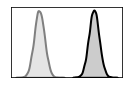

In [88]:
plt.figure(figsize=(2,1.3))
sns.kdeplot(group_1[:, 0], color='grey', fill=True, lw=2, alpha=0.2)
sns.kdeplot(group_1[:, 1], color='black', fill=True, lw=2, alpha=0.2)
plt.xlabel(None);plt.ylabel(None); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene1.pdf', bbox_inches='tight')

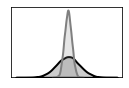

In [89]:
plt.figure(figsize=(2,1.3))
sns.kdeplot(group_2[:, 0], color='black', fill=True, lw=2, alpha=0.2)
sns.kdeplot(group_2[:, 1], color='grey', fill=True, lw=2, alpha=0.2)
plt.xlabel(None);plt.ylabel(None); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene2.pdf', bbox_inches='tight')

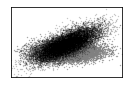

In [92]:
plt.figure(figsize=(2,1.3))

plt.scatter(group_3[:, 0], group_3[:, 1], color='grey', s=0.1, alpha=1)
plt.scatter(group_4[:, 0], group_4[:, 1], color='black', s=0.1, alpha=0.3)
plt.xlabel(None);plt.ylabel(None);
plt.xlim(-10, 20);plt.ylim(-4, 15); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene1x2.png', bbox_inches='tight', dpi=300)

### Simple demo - after capture

In [94]:
capture_eff = 0.15

In [93]:
def generalized_binom_coef(x,y):

    return sp.special.gamma(x+1) / (sp.special.gamma(y+1) * sp.special.gamma(x-y+1))

class toy_rv(stats.rv_discrete):
    
    def _pmf(self, k, n, p):
        
        return generalized_binom_coef(n, k) * p ** (k) * (1-p)**(n-k)
        

In [157]:
group_1[group_1 < 0] = 0.01
group_2[group_2 < 0] = 0.01
group_3[group_3 < 0] = 0.01
group_4[group_4 < 0] = 0.01


group_1_captured = toy_rv().rvs(n=group_1, p=capture_eff).astype(float)
group_2_captured = toy_rv().rvs(n=group_2, p=capture_eff).astype(float)
group_3_captured = toy_rv().rvs(n=group_3, p=capture_eff).astype(float)
group_4_captured = toy_rv().rvs(n=group_4, p=capture_eff).astype(float)

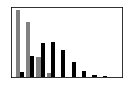

In [168]:
plt.figure(figsize=(2, 1.3))
plt.hist([group_1_captured[:, 0], group_1_captured[:, 1]], color=['grey', 'black'],bins=10)
plt.xlabel(None);plt.ylabel(None); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene1_captured.pdf', bbox_inches='tight')

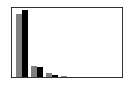

In [169]:
plt.figure(figsize=(2, 1.3))
plt.hist([group_2_captured[:, 0], group_2_captured[:, 1]], color=['grey', 'black'],bins=group_2_captured.max().astype(int))
plt.xlabel(None);plt.ylabel(None); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene2_captured.pdf', bbox_inches='tight')

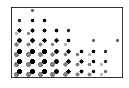

In [186]:
plt.figure(figsize=(2,1.3))

plt.scatter(group_3_captured[:, 0], group_3_captured[:, 1], color='grey', s=5, alpha=0.5)
plt.scatter(group_4_captured[:, 0]+0.3, group_4_captured[:, 1]+0.3, color='black', s=5, alpha=0.5)
plt.xlabel(None);plt.ylabel(None);plt.xticks([]); plt.yticks([]);
plt.savefig('Gene1x2_captured.png', bbox_inches='tight', dpi=300)

### Simple demo - after sequencing

In [160]:
group_1_captured[group_1_captured <= 0] = 0.01
group_2_captured[group_2_captured <= 0] = 0.01
group_3_captured[group_3_captured <= 0] = 0.01
group_4_captured[group_4_captured <= 0] = 0.01


sequencing_saturation = 0.5
group_1_sequenced = toy_rv().rvs(n=group_1_captured, p=sequencing_saturation)
group_2_sequenced = toy_rv().rvs(n=group_2_captured, p=sequencing_saturation)
group_3_sequenced = toy_rv().rvs(n=group_3_captured, p=sequencing_saturation)
group_4_sequenced = toy_rv().rvs(n=group_4_captured, p=sequencing_saturation)

In [161]:
group_1_sequenced[group_1_sequenced > 10] = 0
group_2_sequenced[group_2_sequenced > 10] = 0
group_3_sequenced[group_3_sequenced > 10] = 0
group_4_sequenced[group_4_sequenced > 10] = 0

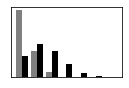

In [170]:
plt.figure(figsize=(2, 1.3))
plt.hist([group_1_sequenced[:, 0], group_1_sequenced[:, 1]], color=['grey', 'black'],bins=group_1_sequenced.max())
plt.xlabel(None);plt.ylabel(None); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene1_sequenced.pdf', bbox_inches='tight')

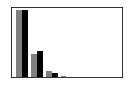

In [171]:
plt.figure(figsize=(2, 1.3))
plt.hist([group_2_sequenced[:, 0], group_2_sequenced[:, 1]], color=['grey', 'black'],bins=group_2_sequenced.max())
plt.xlabel(None);plt.ylabel(None); plt.xticks([]); plt.yticks([]);
plt.savefig('Gene2_sequenced.pdf', bbox_inches='tight')

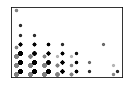

In [185]:
plt.figure(figsize=(2,1.3))

plt.scatter(group_3_sequenced[:, 0], group_3_sequenced[:, 1], color='grey', s=5, alpha=0.5)
plt.scatter(group_4_sequenced[:, 0]+0.3, group_4_sequenced[:, 1]+0.3, color='black', s=5, alpha=0.5)
plt.xlabel(None);plt.ylabel(None);plt.xticks([]); plt.yticks([]);
plt.savefig('Gene1x2_sequenced.png', bbox_inches='tight', dpi=300)

### Fast bootstrap demo

In [141]:
boot_iters = []
nc = 30
nb = 5
a = group_1_sampled[:nc, 0]
boot_iters.append(a)
for i in range(nb):
    boot_iters.append(np.random.choice(a, a.shape[0]))
boot_iters = np.vstack(boot_iters)
boot_iters = pd.DataFrame(
    data=boot_iters, 
    columns=['cell'+str(i) for i in range(1,nc+1)],
    index=['bs'+str(i) if i > 0 else 'obs' for i in range(nb+1)])

boot_iters_freq = []
for i in range(nb+1):
    a = np.bincount(boot_iters.iloc[i, :].values)
    a = np.concatenate([a, np.zeros(8-a.shape[0])])
    boot_iters_freq.append(a)
boot_iters_freq = np.vstack(boot_iters_freq)
boot_iters_freq = pd.DataFrame(
    data=boot_iters_freq, 
    columns=['freq'+str(i) for i in range(boot_iters_freq.shape[1])],
    index=['bs'+str(i) if i > 0 else 'obs' for i in range(nb+1)])

In [142]:
boot_iters.max().max()

2

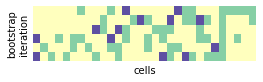

In [157]:
plt.figure(figsize=(4, 1))
sns.heatmap(boot_iters, vmax=2, cbar=None)
plt.xticks([])
plt.yticks([])
plt.ylabel('bootstrap\niteration')
plt.xlabel('cells')
plt.savefig('bootstrap_naive.pdf', bbox_inches='tight')

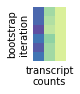

In [159]:
plt.figure(figsize=(0.6, 1))

sns.heatmap(boot_iters_freq.iloc[:, :3], cbar=None, cmap='Spectral', center=0, vmin=5)
plt.xticks([])
plt.yticks([])
plt.ylabel('bootstrap\niteration')
plt.xlabel('transcript\ncounts')
plt.savefig('bootstrap_fast.pdf', bbox_inches='tight')

In [64]:
boot_iters_freq.to_csv('fast_bs.csv')
boot_iters.to_csv('naive_bs.csv')